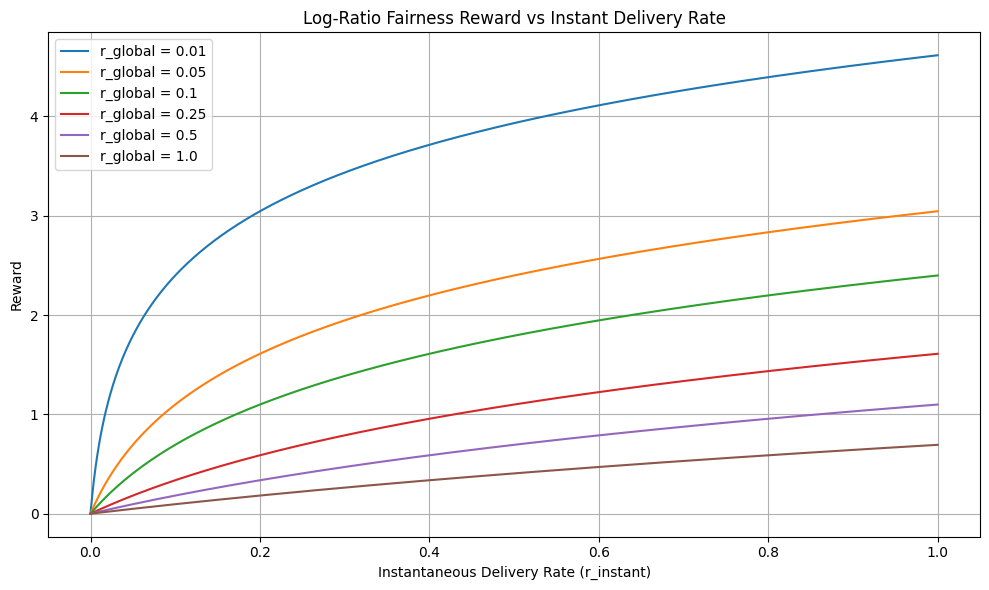

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
epsilon = 1e-6
r_instant = np.linspace(0, 1, 500)  # Simulate r_inst values between 0 and 1

# Different global EDR baselines (historical delivery levels)
r_global_values = [0.01, 0.05, 0.1, 0.25, 0.5, 1.0]

plt.figure(figsize=(10, 6))
for r_global in r_global_values:
    reward = np.log(1 + (r_instant + epsilon) / (r_global + epsilon))
    label = f"r_global = {r_global}"
    plt.plot(r_instant, reward, label=label)

plt.title("Log-Ratio Fairness Reward vs Instant Delivery Rate")
plt.xlabel("Instantaneous Delivery Rate (r_instant)")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
